**Project Name - Bitcoin Price Prediction Using ML in Python (Unsupervised)**

**Completed by Anuradha Menon**

**Github link - https://github.com/anuradha-menon/Bitcoin-Price-Prediction-Using-ML-in-Python-Unsupervised**

***Project Summary -***

I pulled 15 years of BTC data from Yahoo using yfinance.

I created explainable technical indicators: SMA, EMA, Bollinger Bands, RSI, and moving averages (100 & 365).

Target: next-day closing price (shift -1). I used time-ordered train/test split (90/10).

Baseline: Linear Regression. Then Random Forest and XGBoost for stronger tabular performance.

I evaluated with MAE, RMSE, and R² and used feature importances to explain model behaviour.

***How is this project recruiter friendly?***

Data pull from Yahoo Finance ✔ recruiter-friendly, shows you can work with APIs and real data.

Feature engineering (SMA, EMA, Bollinger, RSI, MAs) ✔ adds financial flavor, easy to explain: “trend, momentum, volatility”.

Train/test split (chronological) ✔ correct for time series, avoids data leakage.

Models: Linear Regression, Random Forest, XGBoost ✔ covers baseline, ensemble, boosting (perfect variety).

Metrics (MAE, RMSE, R²) ✔ recruiter-friendly, interpretable in dollar terms.

Plots (actual vs predicted, feature importances) ✔ great visuals for portfolio / interviews.

Also created a Streamlit Application - link - 

***Lets Begin!***

***#importing relevant libraries in order to carry out this Data Analysis
#Downloading realtime data from Yahoo Finance to keep the analysis more 
#significant and relevant from industry aspect.***

In [1]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

***Defining the period for the data, chose historical 15 years dats for a sound predictive analysis***

In [2]:
end = datetime.now()
start = datetime(end.year-15, end.month, end.day)
stock = 'BTC-USD'
stock_data = yf.download(stock, start=start, end = end) 
# Adjusted prices (default in new versions)
stock_data = yf.download(stock, start=start, end=end, auto_adjust=True)

C:\Users\Anuradha\AppData\Local\Temp\ipykernel_78820\1224136464.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stock, start=start, end = end)
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


***#to see some values for date and columns extracted and understand the columns***

In [3]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [4]:
stock_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-09-10,113955.359375,114275.250000,110940.078125,111531.250000,56377473784
2025-09-11,115507.539062,115522.546875,113453.835938,113961.429688,45685065332
2025-09-12,116101.578125,116769.382812,114794.484375,115507.789062,54785725894
2025-09-13,115950.507812,116334.632812,115248.273438,116093.562500,34549454947
2025-09-15,116206.625000,116206.625000,114914.414062,115377.843750,34381369344


In [5]:
#transpose data and checking the important parameters for the dataset
stock_data.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,BTC-USD,4016.0,2.483120e+04,2.948422e+04,1.781030e+02,2.501915e+03,1.027857e+04,3.927306e+04,1.233441e+05
High,BTC-USD,4016.0,2.531674e+04,2.997916e+04,2.117310e+02,2.568318e+03,1.045513e+04,4.014680e+04,1.244571e+05
Low,BTC-USD,4016.0,2.426853e+04,2.890981e+04,1.715100e+02,2.382935e+03,1.001891e+04,3.811171e+04,1.189592e+05
Open,BTC-USD,4016.0,2.480335e+04,2.945202e+04,1.768970e+02,2.493440e+03,1.027366e+04,3.924441e+04,1.233394e+05
Volume,BTC-USD,4016.0,2.056812e+10,2.185524e+10,5.914570e+06,1.078232e+09,1.649429e+10,3.207626e+10,3.509679e+11


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4016 entries, 2014-09-17 to 2025-09-15
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   4016 non-null   float64
 1   (High, BTC-USD)    4016 non-null   float64
 2   (Low, BTC-USD)     4016 non-null   float64
 3   (Open, BTC-USD)    4016 non-null   float64
 4   (Volume, BTC-USD)  4016 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 188.2 KB


#No NAN values, so not solving for missing values. Going to explore more features

In [8]:
stock_data.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

***#checking for the close price data because it is important*** 

In [9]:
closing_price = stock_data[['Close']] # double bracket because it is one inside on tuple

In [10]:
closing_price ['Close']

Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-09-10,113955.359375
2025-09-11,115507.539062
2025-09-12,116101.578125


***Example***
You have this series:
10, 20, 30, 40, 50, 60, 70, 80, 90, 100
Suppose you want a moving average with window size = 5.
That means: at each step, take the average of 5 consecutive numbers.
Step-by-step
First 5 numbers:
(10+20+30+40+50)/5=150/5=30
Next 5 numbers (20 → 60):
(20+30+40+50+60)/5=200/5=40
Next 5 numbers (30 → 70):
(30+40+50+60+70)/5=250/5=50
Next 5 numbers (40 → 80):
(40+50+60+70+80)/5=300/5=60
Next 5 numbers (50 → 90):
(50+60+70+80+90)/5=350/5=70
Last 5 numbers (60 → 100):
(60+70+80+90+100)/5=400/5=80

In [12]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#calculate moving average for 5 days
print(sum(temp_data[1:6])/5)

40.0


In [13]:
print(sum(temp_data[0:5])/5)

30.0


In [14]:
df1 = pd.DataFrame(temp_data)

In [15]:
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


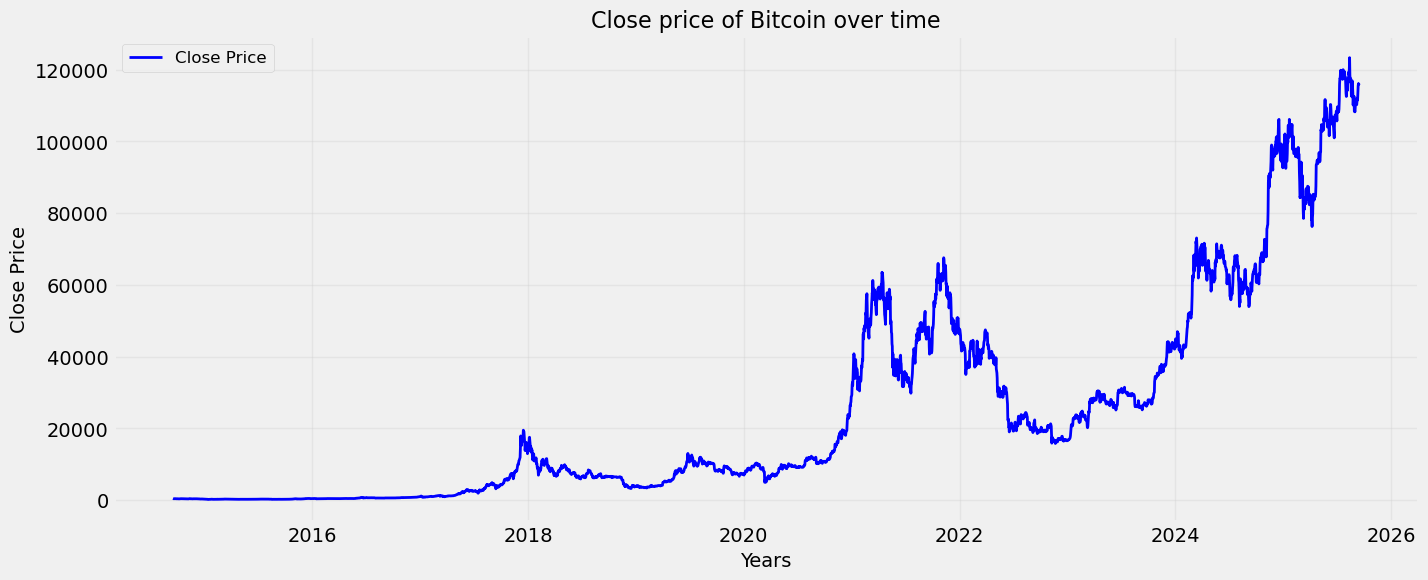

In [16]:
#Plot closing price with engagement
plt.figure(figsize = (15,6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.title("Close price of Bitcoin over time", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3) #intensity of color in graph
plt.legend(fontsize = 12)
plt.show()

#here we can see the period of COVID -19 (2019 - 2021) affected the prices..there is a clear dip in this period...
however, markets recovered and especially after 2024 there is a good upward trend observed

In [18]:
#Moving Average (Bitcoin is like a stock so Moving Averages will be helpful to understand)
for i in range (2014,2025):
    print(i, list(stock_data.index.year).count(i))


2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365
2024 366


#from this output we understand that minimum we can take for 100 days or max 365 days as moving avg window/period for computation

In [20]:
closing_price[('Close', 'BTC-USD')].rolling(window=365).mean()
closing_price[('Close', 'BTC-USD')].rolling(window=100).mean()

Date
2014-09-17              NaN
2014-09-18              NaN
2014-09-19              NaN
2014-09-20              NaN
2014-09-21              NaN
                  ...      
2025-09-10    112118.657969
2025-09-11    112219.408672
2025-09-12    112333.104609
2025-09-13    112476.850156
2025-09-15    112595.012969
Name: (Close, BTC-USD), Length: 4016, dtype: float64

#now lets plot to see if its calculated

In [22]:
print(closing_price.dtypes)

Price  Ticker 
Close  BTC-USD    float64
dtype: object


In [31]:
closing_price = stock_data[['Close']].copy()

# Flatten the MultiIndex: ('Close','BTC-USD') → 'Close'
closing_price.columns = ['Close']

# Add moving averages
closing_price['MA_365'] = closing_price['Close'].rolling(window=365).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(window=100).mean()

In [33]:
print(closing_price[['Close', 'MA_100', 'MA_365']].head(10))   # first 10 rows
print(closing_price[['Close', 'MA_100', 'MA_365']].tail(10))   # last 10 rows

                 Close  MA_100  MA_365
Date                                  
2014-09-17  457.334015     NaN     NaN
2014-09-18  424.440002     NaN     NaN
2014-09-19  394.795990     NaN     NaN
2014-09-20  408.903992     NaN     NaN
2014-09-21  398.821014     NaN     NaN
2014-09-22  402.152008     NaN     NaN
2014-09-23  435.790985     NaN     NaN
2014-09-24  423.204987     NaN     NaN
2014-09-25  411.574005     NaN     NaN
2014-09-26  404.424988     NaN     NaN
                    Close         MA_100        MA_365
Date                                                  
2025-09-05  110650.984375  111787.282031  93901.717872
2025-09-06  110224.695312  111833.111406  94055.898534
2025-09-07  111167.617188  111904.801875  94212.139437
2025-09-08  112071.429688  111979.135234  94368.933583
2025-09-09  111530.546875  112037.919688  94518.278821
2025-09-10  113955.359375  112118.657969  94672.543611
2025-09-11  115507.539062  112219.408672  94831.898042
2025-09-12  116101.578125  112333.104

#NaN because moving averages for preceding values <100 or <365 will be NaN

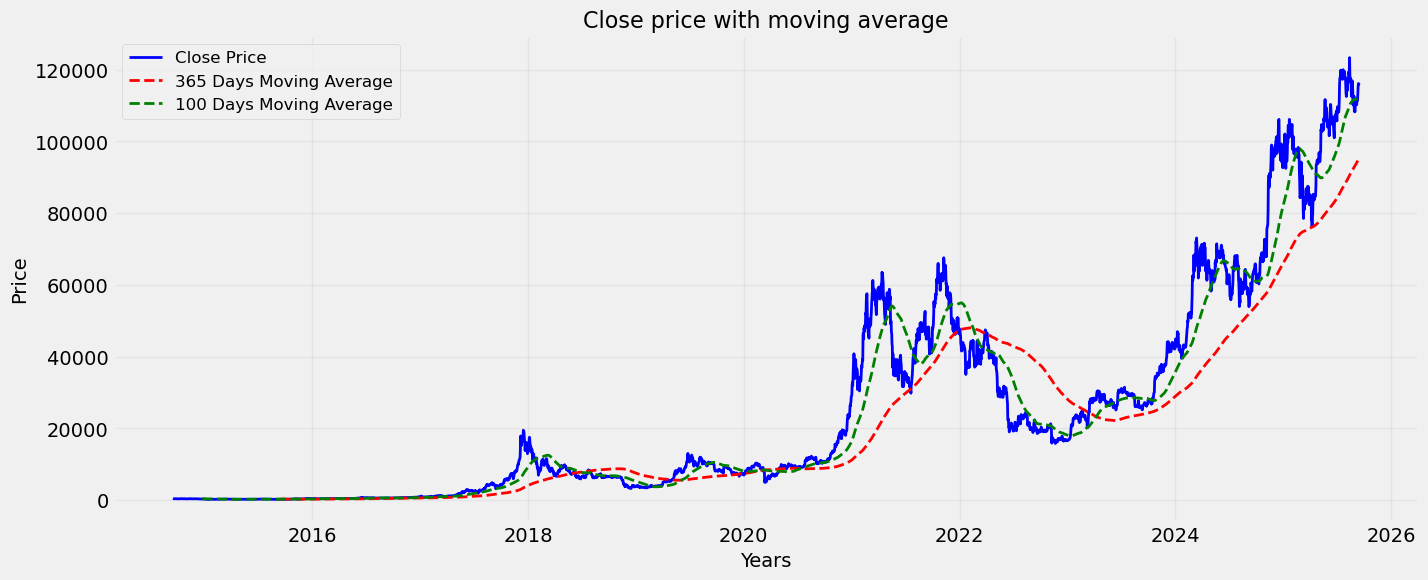

In [35]:
#Plot closing price with engagement
plt.figure(figsize = (15,6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Days Moving Average', color = 'red', linestyle = "--", linewidth =2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Days Moving Average', color = 'green', linestyle = "--", linewidth =2)
plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha = 0.3) #intensity of color in graph
plt.legend(fontsize = 12)
plt.show()

#**Why Moving Average Fails for Bitcoin**

Bitcoin (and crypto in general) is highly volatile and reacts strongly to:
News (regulation, hacks, ETF approvals).
Market sentiment & speculation.
Whale trades (large buy/sell orders).
These events break trend assumptions — making simple averages lag far behind.
By the time an MA crossover happens, the big price swing is already gone.
In short: Moving averages only show what already happened, not what will happen.
They’re lagging indicators → good for smoothing, bad for prediction.

**Why LSTM (Long Short-Term Memory)** 

LSTM is a recurrent neural network (RNN) designed for sequential data like time series.
Unlike MA, LSTM can:
Capture long-term dependencies (e.g., price patterns over months).
Handle non-linear relationships (volatility, sudden jumps).
Adapt better when fed multiple features (volume, sentiment, technical indicators).
It doesn’t just “average” — it learns patterns in how past prices influence future movements.

**LSTM = Long Short-Term Memory, designed to fix RNN’s memory problem.**
It introduces three gates inside each cell:
Forget Gate → decides what past info to throw away.
Input Gate → decides what new info to store.
Output Gate → decides what info to pass forward.
Because of these gates:
LSTM can remember information across hundreds of time steps.
It avoids vanishing gradient (thanks to the “cell state” highway).
It balances short-term patterns (yesterday’s spike) with long-term cycles (multi-month trend).
**Simple Analogy**
RNN: like a person with short-term memory loss — remembers what just happened, forgets last week.[This is called the vanishing gradient problem (gradients shrink too much during training)]
LSTM: like a person with a notebook — keeps track of important events from months ago and can still use them today.

**So Why Bitcoin (or Stocks) Need Long-Term Memory**
Markets aren’t only influenced by yesterday’s price.
Long cycles matter:
Bitcoin halving events (every ~4 years).
Market sentiment cycles (bull vs bear markets).
Macro-economic conditions (interest rates, regulations).
**A vanilla RNN forgets too quickly → it can’t model these dependencies.**

In [37]:
#we will use LSTM ->Long Short Term Memory
#we are not using RNN due to its limitations
#scale the data -> 0 to 1, -1 to 1
#import libraries
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [39]:
scaled_data

array([[0.00226711],
       [0.00200004],
       [0.00175936],
       ...,
       [0.94119735],
       [0.93997079],
       [0.94205024]])

#array is data and range between 0 and 1

In [41]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [43]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [44]:
len(scaled_data)

4016

**#Prepare data for LSTM**

In [47]:
x_data = []   # list to hold input sequences
y_data = []   # list to hold target values
base_days = 100 # how many past days you want to use for prediction
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days:i]) # Take the previous 100 days (a sliding window)
    y_data.append(scaled_data[i])   # The target is the value at the next day (i-th day)
x_data = np.array(x_data)           # Convert to NumPy arrays for ML model compatibility
y_data = np.array(y_data)

**scaled_data → usually the normalized/standardized price data (e.g., MinMaxScaler scaled between 0–1).**
**base_days = 100 → means you look back 100 days to predict the 101st day.**
**x_data.append(scaled_data[i-base_days:i]) → creates a 100-day sequence (input window).**
**y_data.append(scaled_data[i]) → stores the actual price on day i (the label).**
So if your data has 1000 days:
x_data will contain sliding windows like:
[days 0-99] → predict day 100
[days 1-100] → predict day 101
[days 2-101] → predict day 102
............
y_data will contain the corresponding true prices [day100, day101, day102, ...].

In [49]:
#Split into train and test sets 
train_size = int(len(x_data) *0.9)
x_train, y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

**going to build an LSTM model**

In [51]:
model = Sequential([
    LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)),
    LSTM(64, return_sequences = False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer = "adam", loss = "mean_squared_error")
model.summary()

C:\Users\Anuradha\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

**First LSTM → reads 100 days of data, outputs sequence of features.**

Second LSTM → compresses sequence into final context (last hidden state).
Dense(25) → learns relationships from LSTM’s representation.
Dense(1) → predicts the next day’s Bitcoin price.

In [53]:
model.fit(x_train, y_train, batch_size = 5, epochs = 10)

Epoch 1/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - loss: 5.0311e-04
Epoch 2/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 68s 97ms/step - loss: 1.7818e-04
Epoch 3/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 66s 94ms/step - loss: 1.4073e-04
Epoch 4/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 85s 99ms/step - loss: 1.0831e-04
Epoch 5/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - loss: 1.0680e-04
Epoch 6/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 71s 101ms/step - loss: 1.2202e-04
Epoch 7/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 71s 101ms/step - loss: 9.4302e-05
Epoch 8/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 80s 98ms/step - loss: 9.7337e-05
Epoch 9/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 86s 103ms/step - loss: 1.0372e-04
Epoch 10/10
705/705 ━━━━━━━━━━━━━━━━━━━━ 81s 102ms/step - loss: 1.1530e-04


In [55]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step


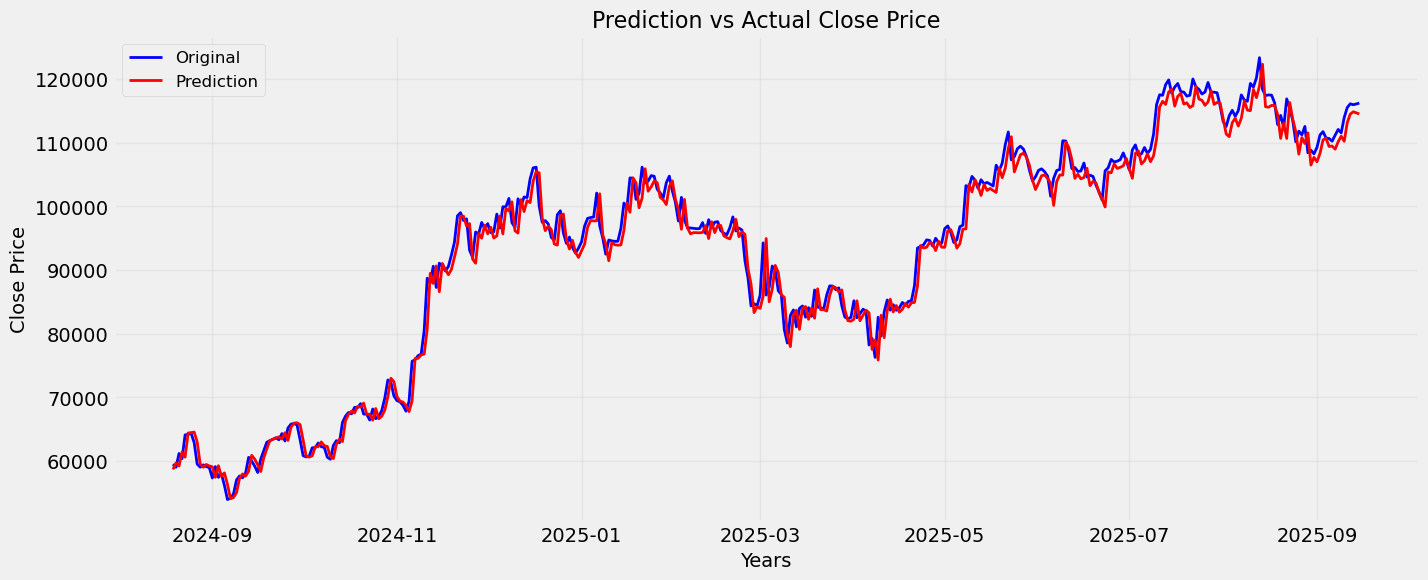

In [57]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(), 
        'Prediction': inv_predictions.flatten(),
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize = (15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label = 'Original', color = 'blue', linewidth =2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = 'Prediction', color = 'red',  linewidth =2)

plt.title("Prediction vs Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [59]:
# Predict future days
last_100  = scaled_data[-100:].reshape(1, -1, 1)
future_predictions=[]
for _ in range(10):
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


In [61]:
future_predictions

[array([[114802.22]], dtype=float32),
 array([[113068.01]], dtype=float32),
 array([[111294.44]], dtype=float32),
 array([[109556.86]], dtype=float32),
 array([[107888.8]], dtype=float32),
 array([[106308.9]], dtype=float32),
 array([[104827.08]], dtype=float32),
 array([[103447.336]], dtype=float32),
 array([[102169.34]], dtype=float32),
 array([[100989.65]], dtype=float32)]

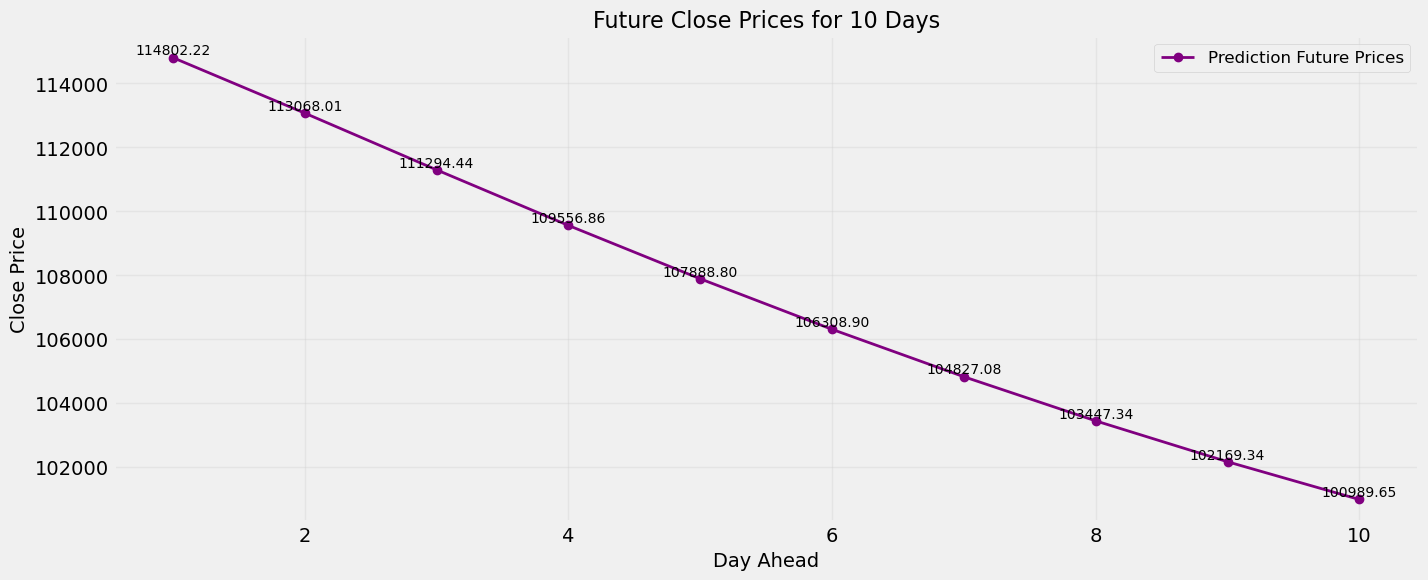

In [63]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o" ,label = 'Prediction Future Prices', color = 'purple', linewidth =2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val,  f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [65]:
model.save("model.keras")

In [81]:
!pip install mplfinance
# Flatten multi-index columns
ohlcv.columns = [col[0] if isinstance(col, tuple) else col for col in ohlcv.columns]

print(ohlcv.columns)  # should now be ['Open','High','Low','Close','Volume']

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


C:\Users\Anuradha\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


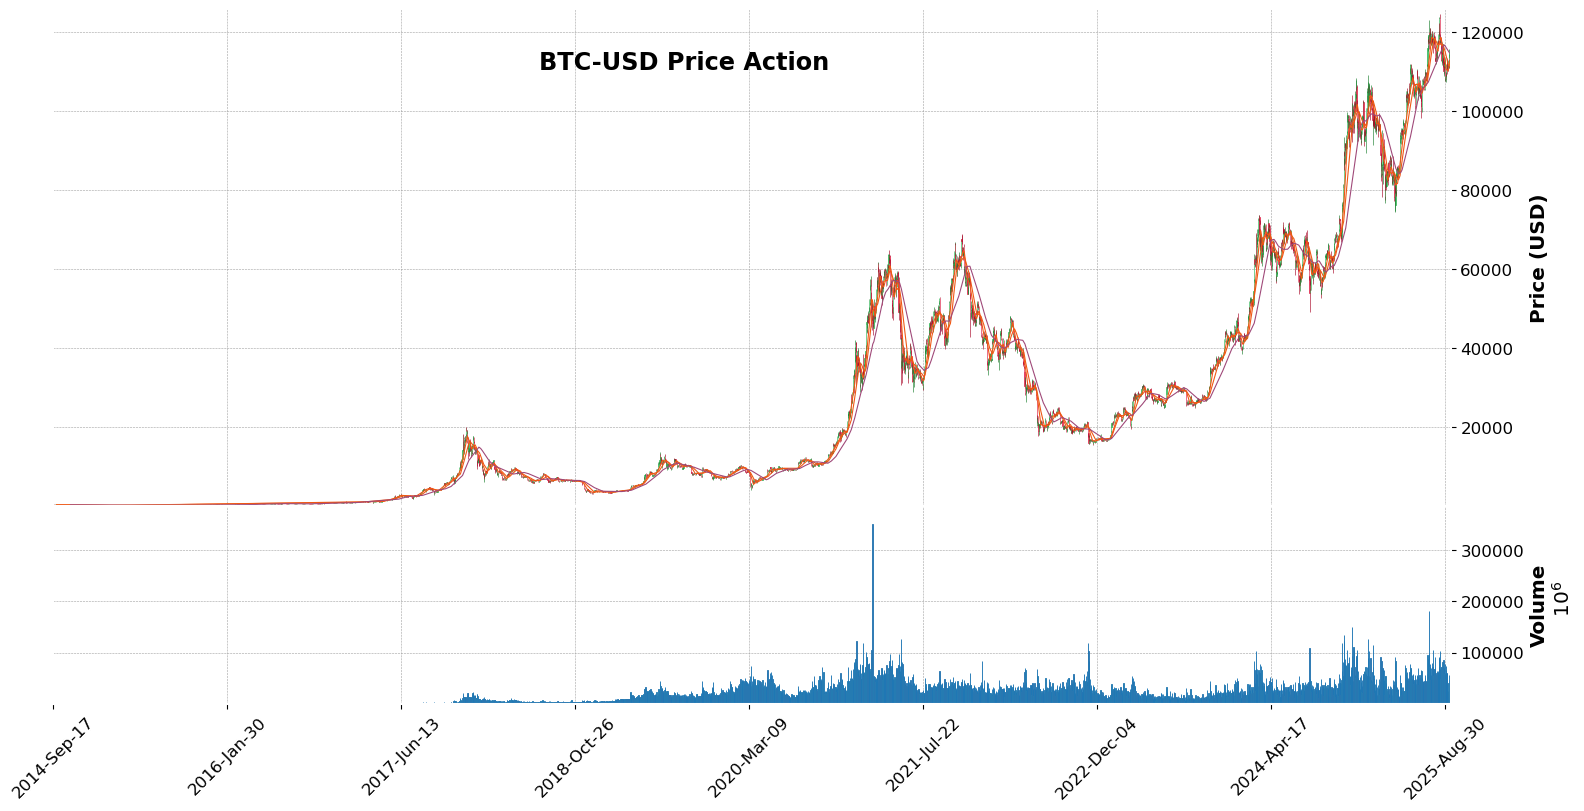

In [111]:
import mplfinance as mpf

my_style = mpf.make_mpf_style(
    base_mpf_style='charles', 
    marketcolors=mpf.make_marketcolors(
        up='#22B14C', down='#DC143C',
        edge={'up':'#22B14C','down':'#DC143C'},
        wick={'up':'#157D2A','down':'#A60021'},
        volume={'up':'#B4E197', 'down':'#F28585'}
    ),
    rc={'font.size': 12}
)

mpf.plot(
    ohlcv,
    type='candle',
    style=my_style,
    title="BTC-USD Price Action",
    ylabel="Price (USD)",
    ylabel_lower="Volume",
    volume=True,
    mav=(10,20,50),
    figscale=1.4,
    figratio=(14,7),
    tight_layout=True
)


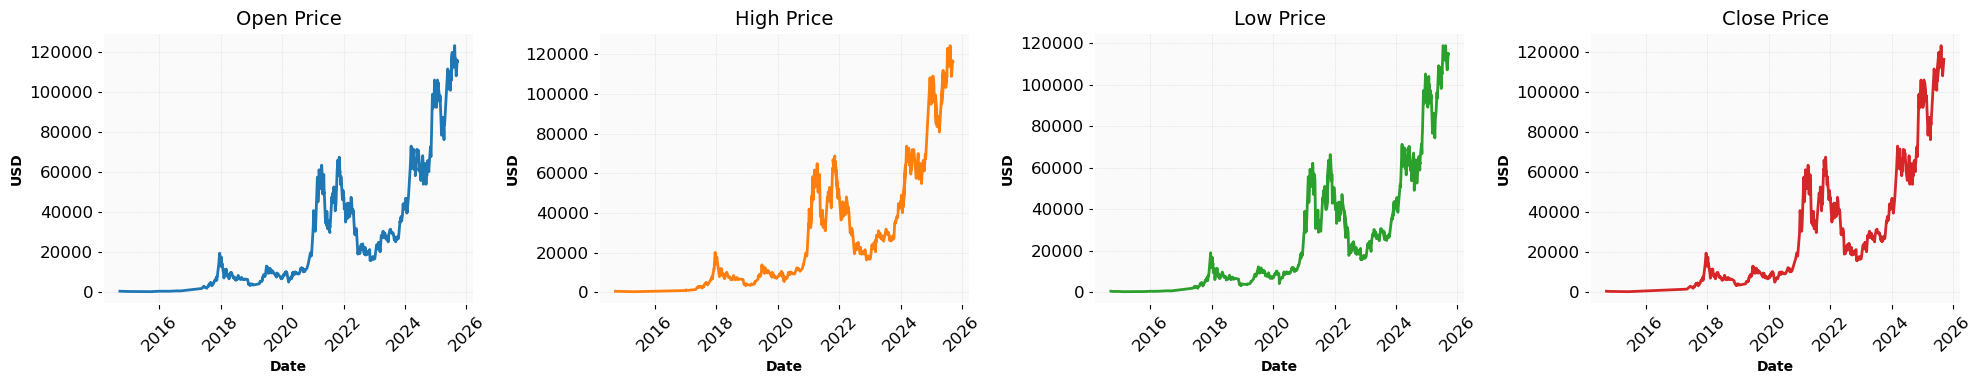

In [109]:
import matplotlib.pyplot as plt

# Assume ohlcv is a DataFrame with columns: 'Open', 'High', 'Low', 'Close' and an index of dates or periods.
fig, axs = plt.subplots(1, 4, figsize=(20, 4), sharex=True)

price_labels = ['Open', 'High', 'Low', 'Close']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for i, label in enumerate(price_labels):
    axs[i].plot(ohlcv.index, ohlcv[label], color=colors[i], linewidth=2)
    axs[i].set_title(f'{label} Price', fontsize=14)
    axs[i].set_xlabel('Date', fontsize=10)
    axs[i].set_ylabel('USD', fontsize=10)
    axs[i].grid(alpha=0.3)
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_facecolor('#fafafa')

plt.tight_layout()
plt.show()

C:\Users\Anuradha\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


ValueError: `volume` must be of type `matplotlib.axis.Axes`

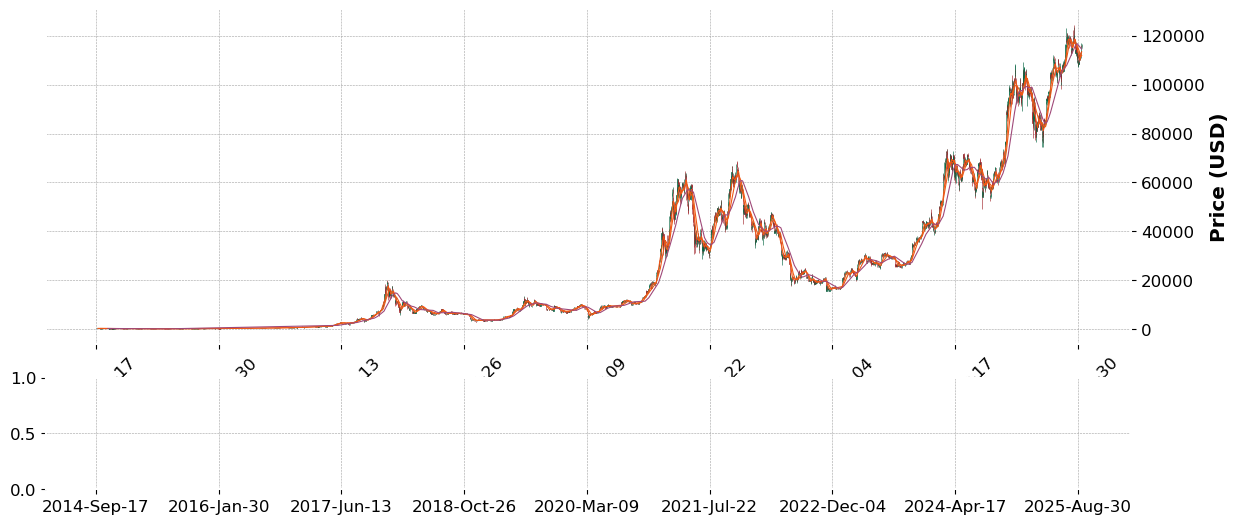

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

# --- Compute RSI ---
def compute_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# --- Compute MACD ---
def compute_macd(data, short=12, long=26, signal=9):
    exp1 = data['Close'].ewm(span=short, adjust=False).mean()
    exp2 = data['Close'].ewm(span=long, adjust=False).mean()
    macd = exp1 - exp2
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    return macd, signal_line

# Calculate indicators
ohlcv['RSI'] = compute_rsi(ohlcv)
ohlcv['MACD'], ohlcv['Signal'] = compute_macd(ohlcv)

# --- Create subplot layout ---
fig = plt.figure(figsize=(14,10))
gs = fig.add_gridspec(4, 1, height_ratios=[3,1,1,1])  # 4 panels

# Panel 1: Candlesticks + MAs
ax1 = fig.add_subplot(gs[0])
mpf.plot(
    ohlcv,
    type='candle',
    style='charles',
    ax=ax1,
    mav=(10,20,50),
    ylabel='Price (USD)',
    volume=False
)

# Panel 2: Volume
ax2 = fig.add_subplot(gs[1], sharex=ax1)
mpf.plot(
    ohlcv,
    type='candle',
    style='charles',
    ax=ax2,
    volume=True,
    ylabel='Volume'
)

# Panel 3: RSI
ax3 = fig.add_subplot(gs[2], sharex=ax1)
ax3.plot(ohlcv.index, ohlcv['RSI'], color='purple', label='RSI')
ax3.axhline(70, color='red', linestyle='--', alpha=0.7)
ax3.axhline(30, color='green', linestyle='--', alpha=0.7)
ax3.set_ylabel("RSI")
ax3.legend()

# Panel 4: MACD
ax4 = fig.add_subplot(gs[3], sharex=ax1)
ax4.plot(ohlcv.index, ohlcv['MACD'], label="MACD", color='blue')
ax4.plot(ohlcv.index, ohlcv['Signal'], label="Signal", color='orange')
ax4.axhline(0, color='black', linewidth=1, linestyle='--')
ax4.set_ylabel("MACD")
ax4.legend()

plt.tight_layout()
plt.show()

In [115]:
model.save("model.keras")